In [22]:
import pandas as pd
import numpy as np
import time
import datetime
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

# Gradient boosting

In [2]:
features = pd.read_csv('./features.csv', index_col='match_id')

In [3]:
#drop features that are not represented in the test set
features_final = ['duration',  'tower_status_radiant', 'tower_status_dire', 
                  'barracks_status_radiant', 'barracks_status_dire']
for f in features_final:
    features = features.drop(f, axis = 1)

In [4]:
#features with missing values
features1 = features.copy() #missing values are replaced with zeros
features2 = features.copy() #missing values are replaced with mean values
features3 = features.copy() #missing values are replaced with very big values
for f in features.columns:
    tmp = 1.0*features[f].isnull().sum()/features[f].count()
    if tmp > 0:
        print "Features {0} has {1:.2%} missing values".format(f, tmp)
        features1[f] = features1[f].fillna(0)
        features2[f] = features2[f].fillna(features2[f].mean())
        features3[f] = features3[f].fillna(features3[f].max()*100)
        
#first_blood features might have missing values in case when there was no blood during the game (= it can be an additional binary feature)

Features first_blood_time has 25.17% missing values
Features first_blood_team has 25.17% missing values
Features first_blood_player1 has 25.17% missing values
Features first_blood_player2 has 82.62% missing values
Features radiant_bottle_time has 19.24% missing values
Features radiant_courier_time has 0.72% missing values
Features radiant_flying_courier_time has 39.40% missing values
Features radiant_first_ward_time has 1.92% missing values
Features dire_bottle_time has 19.91% missing values
Features dire_courier_time has 0.70% missing values
Features dire_flying_courier_time has 36.69% missing values
Features dire_first_ward_time has 1.91% missing values


In [12]:
#our target variable is radiant_win (0,1)
Y1 = features1.radiant_win
X1 = features1[[c for c in features1.columns if c <> 'radiant_win']]
kfl = KFold(Y1.size, n_folds=5, shuffle=True, random_state=42)

In [77]:
Y2 = features2.radiant_win
X2 = features2[[c for c in features2.columns if c <> 'radiant_win']]
kfl2 = KFold(Y2.size, n_folds=5, shuffle=True, random_state=42)

In [5]:
Y3 = features3.radiant_win
X3 = features3[[c for c in features3.columns if c <> 'radiant_win']]
kfl3 = KFold(Y3.size, n_folds=5, shuffle=True, random_state=42)

In [6]:
#scores = []
#scores1 = [] #for feature2
scores2 = [] #for feature3
k_range = [10, 20, 30, 40, 50]
l_range = [0.1, 0.4, 0.45, 0.48, 0.49, 0.5, 0.51, 0.52, 0.55, 0.6, 1.0]
for i in k_range:
    for l in l_range:
        clf =  GradientBoostingClassifier(n_estimators = i, learning_rate = l)
        start_time = datetime.datetime.now()
        scores2.append({'estimators': i, 
                       'learnig rate': l,
                       'score': cross_val_score(clf, X3, Y3, cv=kfl3, scoring='roc_auc').mean()})
        print 'Time elapsed:', datetime.datetime.now() - start_time
#for n_estimators = 30 cross-validation took ~5 min for one iteration

Time elapsed: 0:00:56.303000
Time elapsed: 0:01:08.982000
Time elapsed: 0:01:01.954000
Time elapsed: 0:00:57.914000
Time elapsed: 0:01:00.198000
Time elapsed: 0:00:57.938000
Time elapsed: 0:01:04.372000
Time elapsed: 0:01:07.939000
Time elapsed: 0:01:07.388000
Time elapsed: 0:01:04.697000
Time elapsed: 0:01:14.091000
Time elapsed: 0:02:06.093000
Time elapsed: 0:02:02.772000
Time elapsed: 0:02:08.106000
Time elapsed: 0:02:05.408000
Time elapsed: 0:02:02.712000
Time elapsed: 0:02:02.583000
Time elapsed: 0:02:07.007000
Time elapsed: 0:02:07.132000
Time elapsed: 0:02:24.900000
Time elapsed: 0:01:50.592000
Time elapsed: 0:02:08.445000
Time elapsed: 0:02:49.917000
Time elapsed: 0:02:41.164000
Time elapsed: 0:02:39.085000
Time elapsed: 0:02:54.810000
Time elapsed: 0:02:47.098000
Time elapsed: 0:02:39.505000
Time elapsed: 0:02:51.423000
Time elapsed: 0:02:38.212000
Time elapsed: 0:02:56.369000
Time elapsed: 0:02:40.930000
Time elapsed: 0:02:43.020000
Time elapsed: 0:03:38.730000
Time elapsed: 

In [81]:
tmp = max([s['score'] for s in scores])
print "The best score for is.nan = 0 is {0}".format([s for s in scores if s['score'] == tmp])
print [s for s in scores if s['estimators'] == 30]

The best score for is.nan = 0 is [{'score': 0.70739712867552484, 'learnig rate': 0.5, 'estimators': 50}]
[{'score': 0.69000646786084108, 'learnig rate': 0.1, 'estimators': 30}, {'score': 0.70247428431486014, 'learnig rate': 0.5, 'estimators': 30}, {'score': 0.69623893966140693, 'learnig rate': 1.0, 'estimators': 30}, {'score': 0.70209220327002075, 'learnig rate': 0.4, 'estimators': 30}, {'score': 0.70303652889335155, 'learnig rate': 0.45, 'estimators': 30}, {'score': 0.7013912006684816, 'learnig rate': 0.55, 'estimators': 30}, {'score': 0.70123333931554943, 'learnig rate': 0.6, 'estimators': 30}, {'score': 0.70267982751302516, 'learnig rate': 0.41, 'estimators': 30}, {'score': 0.7023828739493253, 'learnig rate': 0.42, 'estimators': 30}, {'score': 0.70189922695200746, 'learnig rate': 0.43, 'estimators': 30}, {'score': 0.7027607783829154, 'learnig rate': 0.44, 'estimators': 30}, {'score': 0.70280638792833416, 'learnig rate': 0.46, 'estimators': 30}, {'score': 0.70219539382038898, 'learni

In [80]:
tmp = max([s['score'] for s in scores1])
print "The best score for is.nan = 0 is {0}".format([s for s in scores1 if s['score'] == tmp])
print [s for s in scores1 if s['estimators'] == 30]

The best score for is.nan = 0 is [{'score': 0.70831903007785946, 'learnig rate': 0.48, 'estimators': 50}]
[{'score': 0.6889354645861927, 'learnig rate': 0.1, 'estimators': 30}, {'score': 0.70214105182494391, 'learnig rate': 0.4, 'estimators': 30}, {'score': 0.70279091169141472, 'learnig rate': 0.45, 'estimators': 30}, {'score': 0.70242848652114764, 'learnig rate': 0.48, 'estimators': 30}, {'score': 0.70218494247949759, 'learnig rate': 0.49, 'estimators': 30}, {'score': 0.70252075759167465, 'learnig rate': 0.5, 'estimators': 30}, {'score': 0.70269935865851174, 'learnig rate': 0.51, 'estimators': 30}, {'score': 0.70214074644544433, 'learnig rate': 0.52, 'estimators': 30}, {'score': 0.70197085321476782, 'learnig rate': 0.55, 'estimators': 30}, {'score': 0.70115744475570629, 'learnig rate': 0.6, 'estimators': 30}, {'score': 0.69682152594396296, 'learnig rate': 1.0, 'estimators': 30}]


In [8]:
tmp = max([s['score'] for s in scores2])
print "The best score for is.nan = 0 is {0}".format([s for s in scores2 if s['score'] == tmp])

The best score for is.nan = 0 is [{'score': 0.70810955601380177, 'learnig rate': 0.52, 'estimators': 50}]


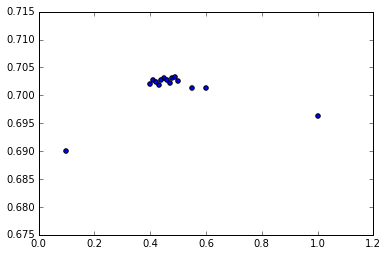

The best score for is.nan = 0 is [{'score': 0.70334164350763362, 'learnig rate': 0.49, 'estimators': 30}]


In [74]:
plt.figure(1)
plt.scatter([s['learnig rate'] for s in scores if s['estimators'] == 30], [s['score'] for s in scores if s['estimators'] == 30])
plt.show()
tmp = max([s['score'] for s in scores if s['estimators'] == 30])
print "The best score for is.nan = 0 is {0}".format([s for s in scores if s['score'] == tmp and s['estimators'] == 30])

# Logistic regression

In [24]:
#Logistic regression
scores_lr1 = []
C_range = np.linspace(0, 1, 50)
C_range = [0.01, 0.1, 0.5, 1.0, 10, 50, 100]
kfl1 = KFold(Y1.size, n_folds=5, shuffle=True, random_state=42)
X_norm = scale(X1, axis=0)
for i in C_range[1:]:
    print i
    clf_lr = LogisticRegression(penalty = 'l2', C=i)
    start_time = datetime.datetime.now()
    scores_lr1.append({"C": c,
                    "score": cross_val_score(clf_lr, X_norm, Y1, cv=kfl1, scoring='roc_auc').mean()})
    print 'Time elapsed:', datetime.datetime.now() - start_time

0.1
Time elapsed: 0:00:31.140000
0.5
Time elapsed: 0:00:31.572000
1.0
Time elapsed: 0:00:31.395000
10
Time elapsed: 0:00:31.226000
50
Time elapsed: 0:00:31.311000
100
Time elapsed: 0:00:31.628000


In [25]:
tmp = max([s['score'] for s in scores_lr1])
print "The best score for is.nan = 0 is {0}".format([s for s in scores_lr1 if s['score'] == tmp])

The best score for is.nan = 0 is [{'C': 1.0, 'score': 0.71652715290247593}]


In [26]:
#Logistic regression without categorical features
features_cat = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 
                'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']

In [29]:
Y4 = features1.radiant_win
X4 = features1[[c for c in features1.columns if (c not in features_cat) and (c <> 'radiant_win')]]
kfl = KFold(Y4.size, n_folds=5, shuffle=True, random_state=42)
scores_lr2 = []
C_range = [0.01, 0.1, 0.5, 1.0, 10, 50, 100]
X_norm = scale(X4, axis=0)
for c in C_range:
    clf_lr = LogisticRegression(penalty = 'l2', C = c)
    start_time = datetime.datetime.now()
    scores_lr2.append({"C": c,
                    "score": cross_val_score(clf_lr, X_norm, Y4, cv=kfl, scoring='roc_auc').mean()})
    print 'Time elapsed:', datetime.datetime.now() - start_time

Time elapsed: 0:00:25.677000
Time elapsed: 0:00:28.695000
Time elapsed: 0:00:28.936000
Time elapsed: 0:00:29.030000
Time elapsed: 0:00:28.928000
Time elapsed: 0:00:28.958000
Time elapsed: 0:00:28.916000


In [30]:
tmp = max([s['score'] for s in scores_lr2])
print "The best score for is.nan = 0 is {0}".format([s for s in scores_lr2 if s['score'] == tmp])

The best score for is.nan = 0 is [{'C': 0.01, 'score': 0.71655938644491324}]


In [103]:
hero_features = ['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', 
                'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
heros =[]
for f in hero_features:
    heros = np.concatenate((heros,features[f].unique()), axis=1)
heros = np.unique(heros)
print "There are {0} unique heros in the game".format(len(heros))

There are 108 unique heros in the game


In [84]:
X_pick = np.zeros((features.shape[0], len(heros)))
for i, match_id in enumerate(features.index):
    for p in xrange(5):
        X_pick[i, np.argwhere(heros == features.ix[match_id, 'r%d_hero' % (p+1)])[0][0]] = 1
        X_pick[i, np.argwhere(heros == features.ix[match_id, 'd%d_hero' % (p+1)])[0][0]] = -1
X_pick = pd.DataFrame(X_pick)
X_pick.columns = ["hero=%d" % i for i in X_pick.columns]
X_pick.index = features.index

In [111]:
Y5 = features1.radiant_win
X5 = features1[[c for c in features1.columns if (c not in features_cat) and (c <> 'radiant_win')]]
#include only N-1 dummy features
X5 = pd.concat([X5,X_pick.loc[:, X_pick.columns[1:]]], axis = 1)
kfl = KFold(Y5.size, n_folds=5, shuffle=True, random_state=42)
scores_lr3 = []
C_range = [0.01, 0.1, 0.5, 1.0, 10, 50, 100]
X_norm = scale(X5, axis=0)
for c in C_range:
    clf_lr = LogisticRegression(penalty = 'l2', C = c)
    start_time = datetime.datetime.now()
    scores_lr3.append({"C": c,
                    "score": cross_val_score(clf_lr, X_norm, Y5, cv=kfl, scoring='roc_auc').mean()})
    print 'Time elapsed:', datetime.datetime.now() - start_time

Time elapsed: 0:01:05.456000
Time elapsed: 0:01:36.050000
Time elapsed: 0:03:07.009000
Time elapsed: 0:02:17.664000
Time elapsed: 0:02:03.681000
Time elapsed: 0:02:19.065000
Time elapsed: 0:02:19.804000


In [112]:
tmp = max([s['score'] for s in scores_lr3])
print "The best score for is.nan = 0 is {0}".format([s for s in scores_lr3 if s['score'] == tmp])

The best score for is.nan = 0 is [{'C': 0.01, 'score': 0.75192899100206279}]


In [119]:
clf = LogisticRegression(penalty = 'l2', C = 1.0)
model = clf.fit(X_norm, Y5)

# Submission

In [113]:
features_test = pd.read_csv('./features_test.csv', index_col='match_id')

In [ ]:
X_test = features_test[[c for c in features_test.columns if (c not in features_cat) and (c <> 'radiant_win')]]

In [116]:
features_test1 = features_test.copy() #missing values are replaced with zeros
features_test2 = features_test.copy() #missing values are replaced with mean values
features_test3 = features_test.copy() #missing values are replaced with very big values
for f in features_test.columns:
    tmp = 1.0*features_test[f].isnull().sum()/features_test[f].count()
    if tmp > 0:
        print "Features {0} has {1:.2%} missing values".format(f, tmp)
        features_test1[f] = features_test1[f].fillna(0)
        features_test2[f] = features_test2[f].fillna(features2[f].mean())
        features_test3[f] = features_test3[f].fillna(features3[f].max()*100)

Features first_blood_time has 26.07% missing values
Features first_blood_team has 26.07% missing values
Features first_blood_player1 has 26.07% missing values
Features first_blood_player2 has 82.52% missing values
Features radiant_bottle_time has 20.27% missing values
Features radiant_courier_time has 0.74% missing values
Features radiant_flying_courier_time has 39.74% missing values
Features radiant_first_ward_time has 1.96% missing values
Features dire_bottle_time has 19.83% missing values
Features dire_courier_time has 0.76% missing values
Features dire_flying_courier_time has 35.75% missing values
Features dire_first_ward_time has 1.55% missing values


In [117]:
X_pick_test = np.zeros((features_test.shape[0], len(heros)))
for i, match_id in enumerate(features_test.index):
    for p in xrange(5):
        X_pick_test[i, np.argwhere(heros == features_test.ix[match_id, 'r%d_hero' % (p+1)])[0][0]] = 1
        X_pick_test[i, np.argwhere(heros == features_test.ix[match_id, 'd%d_hero' % (p+1)])[0][0]] = -1
X_pick_test = pd.DataFrame(X_pick_test)
X_pick_test.columns = ["hero=%d" % i for i in X_pick_test.columns]
X_pick_test.index = features_test.index

In [130]:
X_test = features_test1[[c for c in features_test1.columns if (c not in features_cat) and (c <> 'radiant_win')]]
X_test = pd.concat([X_test,X_pick_test.loc[:, X_pick_test.columns[1:]]], axis = 1)
X_test_norm = scale(X_test, axis=0)
Y_pred = model.predict(X_test_norm)
Y_pred_prob = model.predict_proba(X_test_norm)

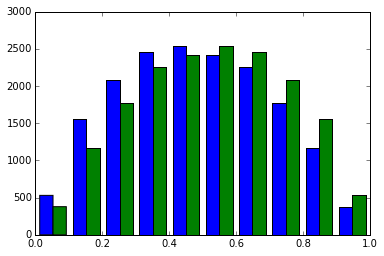

In [131]:
plt.figure(1)
plt.hist(Y_pred_prob)
plt.show()

In [138]:
Y_pred = [i[1] for i in Y_pred_prob]
res = pd.DataFrame(Y_pred)
res.index = X_test.index

In [145]:
res.to_csv('./submission.csv')